In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

%matplotlib inline

stopwords = stopwords.words('english')

In [2]:
twitter_file = "twitter-airline-sentiment/Tweets.csv"

In [3]:
data_frame = pd.read_csv(twitter_file)

# Data Analysis And visualization

In [4]:
data_frame.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [6]:
sentiments_counts  = data_frame['airline_sentiment'].value_counts()

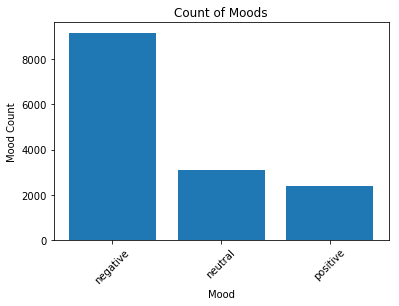

In [7]:
index = [1, 2, 3]
plt.bar(index, sentiments_counts)
plt.xticks(index,['negative', 'neutral', 'positive'], rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [8]:
data_frame['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [9]:
tweet_sent = data_frame[['airline', 'airline_sentiment', 'text']]

In [10]:
tweet_sent.head()

,airline,airline_sentiment,text
0,Virgin America,neutral,@VirginAmerica What @dhepburn said.
1,Virgin America,positive,@VirginAmerica plus you've added commercials t...
2,Virgin America,neutral,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,negative,@VirginAmerica it's really aggressive to blast...
4,Virgin America,negative,@VirginAmerica and it's a really big bad thing...


In [11]:
tweet_sent['word_count'] = tweet_sent['text'].apply(lambda x: len(str(x).split(" ")))
tweet_sent.head()

/home/milla/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,airline,airline_sentiment,text,word_count
0,Virgin America,neutral,@VirginAmerica What @dhepburn said.,4
1,Virgin America,positive,@VirginAmerica plus you've added commercials t...,9
2,Virgin America,neutral,@VirginAmerica I didn't today... Must mean I n...,12
3,Virgin America,negative,@VirginAmerica it's really aggressive to blast...,17
4,Virgin America,negative,@VirginAmerica and it's a really big bad thing...,10


In [12]:
tweet_sent['char_count'] = tweet_sent['text'].str.len()

/home/milla/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
tweet_sent.tail(10)

,airline,airline_sentiment,text,word_count,char_count
14630,American,positive,@AmericanAir Thanks! He is.,4,27
14631,American,negative,@AmericanAir thx for nothing on getting us out...,22,117
14632,American,neutral,"“@AmericanAir: @TilleyMonsta George, that does...",17,145
14633,American,negative,@AmericanAir my flight was Cancelled Flightled...,21,141
14634,American,negative,@AmericanAir right on cue with the delays👌,7,45
14635,American,positive,@AmericanAir thank you we got on a different f...,11,63
14636,American,negative,@AmericanAir leaving over 20 minutes Late Flig...,23,150
14637,American,neutral,@AmericanAir Please bring American Airlines to...,7,60
14638,American,negative,"@AmericanAir you have my money, you change my ...",23,135
14639,American,neutral,@AmericanAir we have 8 ppl so we need 2 know h...,30,138


## Text preprocessing

In [14]:
tweet_sent['text'] = tweet_sent.text.apply(lambda x: str(x).lower())
tweet_sent.head(5)

/home/milla/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,airline,airline_sentiment,text,word_count,char_count
0,Virgin America,neutral,@virginamerica what @dhepburn said.,4,35
1,Virgin America,positive,@virginamerica plus you've added commercials t...,9,72
2,Virgin America,neutral,@virginamerica i didn't today... must mean i n...,12,71
3,Virgin America,negative,@virginamerica it's really aggressive to blast...,17,126
4,Virgin America,negative,@virginamerica and it's a really big bad thing...,10,55


In [15]:
tweet_sent['text'] = tweet_sent['text'].apply(lambda x: [x.replace('[^\w\s]', '') for x in x.split() 
                                                             if not x in stopwords 
                                                                 and not x.startswith('@')])
tweet_sent.head(5)

/home/milla/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/home/milla/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,airline,airline_sentiment,text,word_count,char_count
0,Virgin America,neutral,[said.],4,35
1,Virgin America,positive,"[plus, you've, added, commercials, experience....",9,72
2,Virgin America,neutral,"[didn't, today..., must, mean, need, take, ano...",12,71
3,Virgin America,negative,"[it's, really, aggressive, blast, obnoxious, ""...",17,126
4,Virgin America,negative,"[it's, really, big, bad, thing]",10,55


## conver words to vectors

In [19]:
def convert_sentiment(word):
    if word == 'negative':
        return -1
    elif word == 'positive':
        return 1
    else:
        return 0
tweet_sent['airline_sentiment'] =  tweet_sent['airline_sentiment'].apply(lambda x: convert_sentiment(x))
tweet_sent.head(5)

/home/milla/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,airline,airline_sentiment,text,word_count,char_count
0,Virgin America,0,[said.],4,35
1,Virgin America,1,"[plus, you've, added, commercials, experience....",9,72
2,Virgin America,0,"[didn't, today..., must, mean, need, take, ano...",12,71
3,Virgin America,-1,"[it's, really, aggressive, blast, obnoxious, ""...",17,126
4,Virgin America,-1,"[it's, really, big, bad, thing]",10,55


## Model
Lights camera Run-a-way